In [37]:
import pathlib

path=str(pathlib.Path().resolve())+"/"

In [38]:
import pandas as pd


df = pd.read_csv(path+"creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Dvidimos los datos de la siguiente estructura:

- **X_train,X_val,y_train,y_val:** Serán datos en los que no se contendrán fraudes para entrenar el modelo.

- **X_test,y_test:** Tendrán todos los fraudes y la misma cantidad de no fraudes elegidos al azar.

- **dfSoloFraudes:** Contendrá un DataFrame de solo fraudes.

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Recogemos la mitad de Fraudes y la mitad no fraudes elegidos al azar
dfFraudes=pd.concat([df[df['Class']==1],df[df['Class']==0].sample(int(len(df[df['Class']==1])),random_state=42)])

# Hacemos un DataFrame de solo fraudes
dfSoloFraudes=df[df['Class']==1]

# Borramos los datos que son fraudes y los elegidos al azar
df = df[~df.isin(dfFraudes).all(1)]

# Reordenamos el DataFrame para que los datos no esten ordenados
dfFraudes=dfFraudes.sample(frac=1)

X_test = dfFraudes.drop("Class",axis=1)
y_test = dfFraudes['Class']

# Dividimos los datos para el entrenamiento
X_train,X_val,y_train,y_val = train_test_split(df.drop("Class",axis=1),df['Class'],test_size=0.2,random_state=42)

In [40]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
255545,157278.0,1.984787,-1.937036,0.486613,-1.245536,-2.518536,-0.544524,-1.819244,-0.074875,-0.659777,...,-0.127858,0.174011,0.889289,0.218248,0.492384,-0.584599,-0.135040,0.070319,-0.000205,120.00
248296,153875.0,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,0.00
76163,56424.0,0.319007,-1.072867,-0.216146,1.494709,-0.627063,-0.761867,0.941687,-0.430272,-0.267431,...,0.914995,0.332521,-0.022461,-0.537691,0.452072,0.555495,-0.383543,-0.068520,0.106578,484.00
239501,150139.0,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,...,-1.928527,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,237.26
143336,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41395,40662.0,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,...,-0.108006,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00
142557,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.634184,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33
271842,164776.0,1.947737,0.009899,-1.244776,1.302383,0.040133,-1.067379,0.301814,-0.311473,0.330881,...,-0.237873,0.279370,0.832769,-0.026910,-0.020475,0.268850,-0.425449,-0.005599,-0.046730,42.80
239499,150138.0,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,...,0.532145,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00


Estandarizamos los valores de Time y Amount que son los únicos no estandarizados

In [41]:
from sklearn.preprocessing import StandardScaler

s=StandardScaler()

def estandar(x,col):
    """Estandariza los valores del DataFrame

    Args:
        x (DataFrame): DataFrame
        col (List): Lista de nombres de columnas

    Returns:
        List: Columnas ya estandarizadas
    """
    v=s.fit_transform(x,col)
    return v[:,0],v[:,1]


X_train["Time"],X_train["Amount"] = estandar(X_train,['Time','Amount'])
X_val["Time"],X_val["Amount"] = estandar(X_val,['Time','Amount'])
X_test["Time"],X_test["Amount"] = estandar(X_test,['Time','Amount'])
dfSoloFraudes["Time"],dfSoloFraudes["Amount"] = estandar(dfSoloFraudes,['Time','Amount'])

dfSoloFraudes = dfSoloFraudes.drop("Class",axis=1)
dfSoloFraudes

C:\Users\diego.guizanlopez\AppData\Local\Temp\ipykernel_13544\1503039647.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSoloFraudes["Time"],dfSoloFraudes["Amount"] = estandar(dfSoloFraudes,['Time','Amount'])


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,-1.681237,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.362963
623,-1.679856,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,0.255048
4920,-1.596360,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.364273
6108,-1.543542,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,0.055185
6329,-1.532388,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,0.886287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,1.849785,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,0.419677
280143,1.854075,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.907584
280149,1.854159,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,0.604387
281144,1.867029,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.244676


# Predicción de Modelos

In [42]:
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical

Creamos una red neuronal denominada *encoder* con la siguiente estructura:
- Dense(30,input_shape=x,"relu")
- Dense(20,"relu")
- Dense(10,"relu")
- Dense(5, "relu")

In [43]:

encoder = keras.models.Sequential([
    keras.layers.Dense(30,input_shape=[X_train.shape[1]],activation="relu"),
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(5, activation="relu")
])
encoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                930       
                                                                 
 dense_9 (Dense)             (None, 20)                620       
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 5)                 55        
                                                                 
Total params: 1815 (7.09 KB)
Trainable params: 1815 (7.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Creamos una red neuronal denominada *decoder* con la siguiente estructura:
- Dense(10,input_shape=5,"relu")
- Dense(20,"relu")
- Dense(30,"relu")
- Dense(x)

In [44]:
decoder = keras.models.Sequential([
    keras.layers.Dense(10, input_shape=[5], activation="relu"),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(X_train.shape[1]),
    #keras.layers.Reshape(22)
])
decoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                60        
                                                                 
 dense_13 (Dense)            (None, 20)                220       
                                                                 
 dense_14 (Dense)            (None, 30)                630       
                                                                 
 dense_15 (Dense)            (None, 30)                930       
                                                                 
Total params: 1840 (7.19 KB)
Trainable params: 1840 (7.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Juntamos los dos modelos para crear el autoencoder que nos servirá para los datos

In [45]:
autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 5)                 1815      
                                                                 
 sequential_4 (Sequential)   (None, 30)                1840      
                                                                 
Total params: 3655 (14.28 KB)
Trainable params: 3655 (14.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Para la compilación vamos por el *Mean Squared Error* y con el optimizador *Adam*

In [46]:
autoencoder.compile(loss="mse", optimizer="adam")

Entrenamos el modelo con un EarlyStopping

In [47]:
import sys


early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history = autoencoder.fit(X_train,X_train, epochs=sys.maxsize,
                          validation_data=[X_val, X_val],callbacks=[early_stopping_cb])

Epoch 1/9223372036854775807
7096/7096 [==============================] - 14s 2ms/step - loss: 0.4422 - val_loss: 0.3417
Epoch 2/9223372036854775807
7096/7096 [==============================] - 12s 2ms/step - loss: 0.3209 - val_loss: 0.3133
Epoch 3/9223372036854775807
7096/7096 [==============================] - 12s 2ms/step - loss: 0.3000 - val_loss: 0.2965
Epoch 4/9223372036854775807
7096/7096 [==============================] - 12s 2ms/step - loss: 0.2872 - val_loss: 0.3383
Epoch 5/9223372036854775807
7096/7096 [==============================] - 12s 2ms/step - loss: 0.2732 - val_loss: 0.2649
Epoch 6/9223372036854775807
7096/7096 [==============================] - 12s 2ms/step - loss: 0.2589 - val_loss: 0.2613
Epoch 7/9223372036854775807
7096/7096 [==============================] - 12s 2ms/step - loss: 0.2516 - val_loss: 0.2475
Epoch 8/9223372036854775807
7096/7096 [==============================] - 11s 2ms/step - loss: 0.2450 - val_loss: 0.2394
Epoch 9/9223372036854775807
7096/7096 [=

<Axes: >

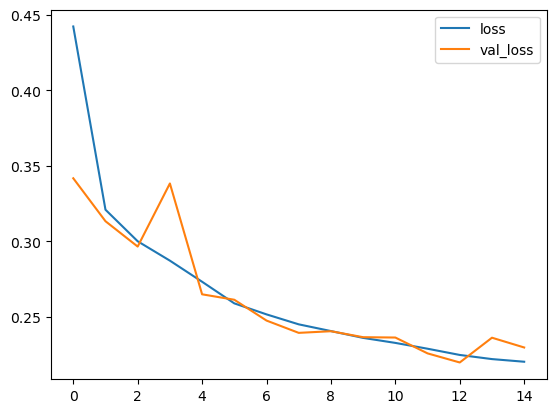

In [48]:
import pandas as pd

# Cuando hay una separación notable tras cruzada es el sobreentrenamiento
pd.DataFrame(history.history).plot()

Debería tener mucho Loss con los valores de *Test*

In [49]:
autoencoder.evaluate(X_test,X_test)

31/31 [==============================] - 0s 1ms/step - loss: 8.6186


8.618636131286621

Calculamos el MSE para cada valor predicho por el modelo con el DataFrame de solo Fraudes

In [50]:
from sklearn.metrics import mean_squared_error

x = dfSoloFraudes

predict = autoencoder.predict(x)

# Calcula el MSE para cada valor predicho
mse_values_error = [np.sqrt(mean_squared_error([true_val], [pred_val])) for true_val, pred_val in zip(x.values, predict)]




16/16 [==============================] - 0s 2ms/step


In [51]:
mse_values_error

[1.614098028246923,
 1.333187076034074,
 1.7200497898467229,
 4.062815429610226,
 0.7599975342959935,
 2.624785131780298,
 2.6329288764927874,
 2.0195078405311593,
 1.9413012970543475,
 2.687263550751256,
 2.6914693045433054,
 2.0274306524902252,
 2.633649016837739,
 2.6347142376707295,
 1.9312529231755855,
 3.191322690523419,
 3.178418417978282,
 3.196346760220565,
 3.19500558812027,
 3.15639538398679,
 3.160414116310002,
 4.094466806712851,
 3.180879284362596,
 3.1836547015721584,
 2.586338001782731,
 7.099485684359795,
 1.860283477901829,
 7.141296628518928,
 7.088091614980643,
 1.8952222611418488,
 4.002050232494107,
 4.009259632164112,
 2.4337562450567303,
 7.138428357892508,
 7.19389201845164,
 7.13794456081609,
 7.12660261666138,
 7.094492253757056,
 2.327811893279415,
 0.5672226091718875,
 0.5850978426557275,
 0.6874551894961334,
 7.074405125301333,
 7.269423584527529,
 8.366329633991894,
 7.296628162373381,
 7.329217455499812,
 7.113917676149515,
 7.093390827846236,
 7.0744632

Sacamos el STD para saber el intervalo de margen entre los MSE de Fraudes

In [52]:
mse_values_error
st = np.std(mse_values_error)
st

2.401075164599448

Calculamos el MSE para cada valor predicho por el modelo con el DataFrame de los datos de Validación

In [53]:
from sklearn.metrics import mean_squared_error

x = X_val

predict = autoencoder.predict(x)

# Calcula el MSE para cada valor
mse_values = [np.sqrt(mean_squared_error([true_val], [pred_val])) for true_val, pred_val in zip(x.values, predict)]


  42/1774 [..............................] - ETA: 2s 

1774/1774 [==============================] - 2s 1ms/step


In [54]:
mse_values

[0.3566649329690188,
 0.39559563904928746,
 0.19736464685441932,
 0.4065944596363804,
 0.6815570423606976,
 0.3439146149349179,
 0.4866577097458969,
 0.8484380548264387,
 0.2571100474029535,
 0.4702320718617075,
 0.5258912470331635,
 0.19797440385647994,
 0.3217229379940164,
 0.24394526976175007,
 0.6992477423050196,
 0.24240460403414715,
 0.20128918845305904,
 0.44143535606493167,
 0.40840390172722674,
 0.553224200366032,
 0.34333403807329366,
 0.4118977263871045,
 0.49633421805015593,
 0.21846634406297927,
 0.3924604414805878,
 0.22963155871810143,
 0.6714237863404195,
 0.39496528184436575,
 0.29103941754655005,
 0.5349979249817984,
 1.1728733979010801,
 0.4033731663804064,
 0.24962846454582946,
 0.2057796494386107,
 0.7410372160434707,
 0.4383505928016181,
 0.5119437975100269,
 0.2651812178648058,
 0.2609684309051212,
 0.2865508720810985,
 0.2956889083694408,
 0.46409303080963216,
 0.3002166952660814,
 0.485888991077701,
 0.26507026248205956,
 0.29760224741652586,
 0.215001120003539

Sacamos el STD para saber el intervalo de margen entre los MSE de los que no son Fraudes

In [55]:
stNoFraudes = np.std(mse_values)
#range=[stNoFraudes*2+np.array(mse_values).mean(),np.array(mse_values).mean()-stNoFraudes*2]
stNoFraudes

0.22407707399921092

In [56]:
media_fraud = np.mean(mse_values_error)
media_val = np.mean(mse_values)

Calculamos si es 0 o 1 el valor que debería dar la predicción

In [57]:
z = (media_fraud - media_val)/(st + stNoFraudes)
frontera = media_val + z*stNoFraudes

def detectar_fraude(predict,value):
    """Detecta el fraude con los valores pasados

    Args:
        predict (np.array): Valores predichos del modelo
        value (np.array): Valores reales

    Returns:
        int: 0 o 1 dependiendo si es o no Fraude
    """
    global frontera
    error=np.sqrt(mean_squared_error(predict,value))
    if error>frontera:
        return 1
    return 0


x = X_test

predict = autoencoder.predict(x)

errores = [detectar_fraude(pred_val, true_val) for true_val, pred_val in zip(x.values,predict)]


31/31 [==============================] - 0s 1ms/step


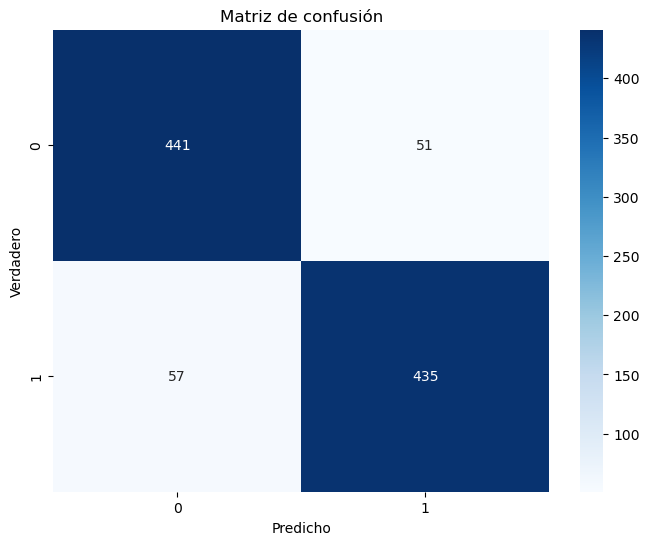

In [58]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, errores)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.title('Matriz de confusión')
plt.show()